In [1]:
%reset -f
%matplotlib qt
import sys
import mne
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pick_ch=['P9','P7','P5','P3','PO7','PO3','O1','P10','P8','P6','P4','PO8','PO4','O2']
#%load_ext autoreload
#%autoreload 2
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
mne.__version__
mne.set_log_level("WARNING")

infolder, outfolder = find_folder()
subs=['02','03','04','05','06','07','08','09','10']
summary = dict()

In [2]:
%run EEG_auxiliary_module.ipynb
data=list()
labels = list()
for j in subs:
    fname = op.join(outfolder,'S'+j+'_perc_aver-epo.fif')
    epochs = mne.read_epochs(fname)
    X, Y = convert_epochs_to_3D_array(epochs, times=(0.05,0.65))
    data.append(X)
    labels.append(Y)

In [3]:
import numpy as np
from pyeeg import *
import pdb
three_to_two = lambda x: np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]),order='F')
out=list()
freqs = [0.1,4,7,14,30,40]
for i in range(len(data)):
    print(i)
    temp2=list()
    for j in range(data[i].shape[0]):
        temp1=list()
        for k in range(data[i].shape[1]):
            temp_data = data[i][j,k,:]
            temp_spec = bin_power(temp_data, freqs, 200)
            temp_hurst = hurst(temp_data).ravel()
            temp_hjorth = hjorth(temp_data, D=None)
            temp_hdf = hfd(temp_data, Kmax=10).ravel()
            temp_pfd = pfd(temp_data).ravel()
            temp_ent = permutation_entropy(temp_data,5,1).ravel()
            temp_dfa = dfa(temp_data).ravel()
            #pdb.set_trace()
            #temp_lle = LLE(temp_data,2,4,1,1).ravel()
            temp3 = np.concatenate((temp_data,temp_spec[1],temp_hurst,temp_hjorth,temp_hdf,temp_pfd,temp_ent,temp_dfa))
            temp1.append(temp3)
        temp2.append(temp1)
    out.append(three_to_two(np.array(temp2)))
        

        


0
1
2
3
4
5
6
7
8


In [164]:
temp_hjorth

(0.016296579420461994, 28.234646323894072)

In [4]:
%run EEG_auxiliary_module.ipynb

results=[]# Loading first S08 session
durs=[];
for sub in range(len(out)):
    print(sub)
    X=out[sub]
    Y=labels[sub]
    blocks = int(X.shape[0]/100)
    confusion, duration = run_eeg_svm(X, Y, blocks)
    results.append(confusion)
    durs.append(duration)
    print(i)
os.system('say "your program has finished"')


Progress: [####################] 100.0%
The overall accuracy is 60.5 and the duration is 7.9 minutes
8


0

In [141]:
%run EEG_auxiliary_module.ipynb
summary['bin_power+concat'] = [freqs, presenting_results(results, ind=subs, to_print = True)]

      up unf     up fam    inv_unf    inv fam         up        inv  \
0  49.969697  52.787879  48.954545  54.227273  50.296846  51.365492   
1  52.013889  48.222222  50.055556  53.152778  49.619048  50.965986   
2  50.375000  52.430556  51.958333  51.277778  50.843537  51.646259   
3  52.388889  51.986111  54.013889  48.111111  50.789116  50.697279   
4  53.611111  53.055556  50.986111  46.513889  52.683673  48.520408   
5  54.916667  53.861111  61.930556  55.541667  53.860544  58.496599   
6  52.680556  49.777778  53.833333  55.361111  51.173469  54.258503   
7  50.083333  52.291667  51.680556  50.638889  51.612245  51.030612   

         all Subs  
0  52.572084   02  
1  52.684343   03  
2  51.223064   04  
3  53.291246   05  
4  54.058081   06  
5  61.865320   07  
6  56.107744   08  
7  55.085017   09  


In [105]:
%run EEG_auxiliary_module.ipynb
summary['bin_power+concat'] = [freqs, presenting_results(results, ind=subs, to_print = True)]

      up unf     up fam    inv_unf    inv fam         up        inv  \
0  53.590909  57.242424  59.287879  57.424242  55.959184  57.721707   
1  52.361111  54.361111  55.611111  53.291667  52.914966  54.088435   
2  53.083333  48.277778  53.527778  54.208333  50.585034  54.210884   
3  56.847222  53.375000  56.430556  49.500000  55.438776  53.244898   
4  52.875000  52.694444  57.805556  51.972222  52.908163  55.489796   
5  59.666667  56.763889  66.416667  62.611111  58.585034  64.200680   
6  54.972222  59.777778  60.638889  58.861111  57.414966  59.394558   
7  51.069444  53.569444  53.138889  53.847222  53.275510  53.659864   

         all Subs  
0  66.063361   02  
1  61.281145   03  
2  54.776094   04  
3  63.680976   05  
4  61.957912   06  
5  70.984007   07  
6  65.260101   08  
7  65.345118   09  


In [5]:
presenting_results(results, ind=subs, to_print = True)

      up unf     up fam    inv_unf    inv fam         up        inv  \
0  53.303030  57.287879  59.060606  57.560606  55.721707  57.662338   
1  52.583333  54.388889  55.597222  53.375000  53.040816  54.057823   
2  53.013889  48.819444  53.500000  54.291667  50.649660  54.102041   
3  56.986111  53.319444  56.472222  49.472222  55.336735  53.204082   
4  53.055556  52.708333  57.833333  51.805556  52.908163  55.353741   
5  59.527778  56.666667  66.319444  62.611111  58.530612  64.166667   
6  54.930556  59.375000  60.527778  58.708333  57.227891  59.265306   
7  51.236111  53.930556  53.472222  54.083333  53.408163  53.901361   
8  56.013889  53.180556  59.430556  55.430556  54.904762  57.265306   

         all Subs  
0  65.825528   02  
1  61.101010   03  
2  54.707071   04  
3  63.486532   05  
4  61.938552   06  
5  70.951178   07  
6  65.126263   08  
7  65.506734   09  
8  60.505051   10  


,up unf,up fam,inv_unf,inv fam,up,inv,all,Subs
0,53.303030,57.287879,59.060606,57.560606,55.721707,57.662338,65.825528,02
1,52.583333,54.388889,55.597222,53.375000,53.040816,54.057823,61.101010,03
2,53.013889,48.819444,53.500000,54.291667,50.649660,54.102041,54.707071,04
3,56.986111,53.319444,56.472222,49.472222,55.336735,53.204082,63.486532,05
4,53.055556,52.708333,57.833333,51.805556,52.908163,55.353741,61.938552,06
5,59.527778,56.666667,66.319444,62.611111,58.530612,64.166667,70.951178,07
6,54.930556,59.375000,60.527778,58.708333,57.227891,59.265306,65.126263,08
7,51.236111,53.930556,53.472222,54.083333,53.408163,53.901361,65.506734,09
8,56.013889,53.180556,59.430556,55.430556,54.904762,57.265306,60.505051,10


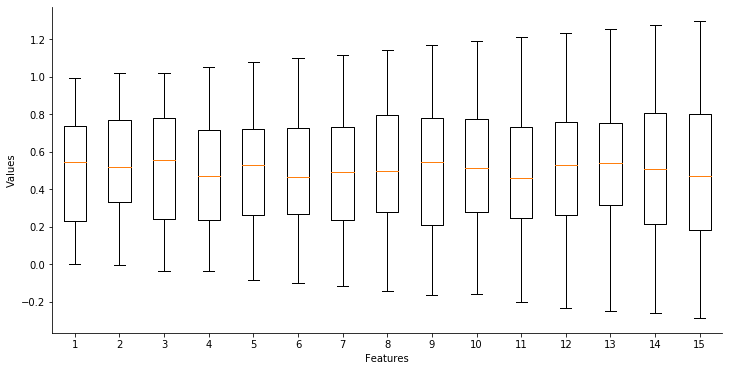

In [16]:
spread = np.linspace(0, 0.3, n_features)
class1 = np.random.uniform(size=(n_trials, n_features)) + spread
class2 = np.random.uniform(size=(n_trials, n_features)) - spread
x = np.concatenate((class1, class2), axis=0)
y = np.ravel([[k]*n_trials for k in np.arange(2)])

plt.figure(0, figsize=(12,6))
plt.boxplot(x);
rmaxis(plt.gca(), ['top', 'right']);
plt.xlabel('Features'), plt.ylabel('Values');

In [206]:
from brainpipe.classification import *
from brainpipe.visual import *

x = out[0]
y = labels[0]

model = 'svm'
kern='rbf'
clf_obj = defClf(y, clf=model, kern=kern)

rep = 5
cvmodel = 'skfold'
cv_obj = defCv(y, cvtype=cvmodel, rep=rep)

cla_obj = classify(y, clf=clf_obj, cvtype=cv_obj)

cla_obj.info.clfinfo

da, pvalue, daperm = cla_obj.fit(x, n_perm=20, method='label_rnd')


# Display informations about features :
df = cla_obj.info.featinfo.copy() 
df['feats'] =['delta','theta','alpha','beta','gamma','hurst','hjorth_1','hjorth_2','hdf','pfd','ent','dfa']*64
df['els'] = np.repeat(epochs.info['ch_names'],12)

In [194]:
df = cla_obj.info.featinfo.copy()
df.drop(['s'], axis=1)
df['feats'] =['delta','theta','alpha','beta','gamma','hurst','hjorth_1','hjorth_2','hdf','pfd','ent','dfa']*64
df['els'] = np.repeat(epochs.info['ch_names'],12)
df

,S V M - r b f / 5 - r e p _ 1 0 - s k f o l d D A ( % ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d S T D ( + / - ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d p - v a l u e s ( B i n o m i a l ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d p - v a l u e s ( P e r m u t a t i o n s ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d G r o u p,f e a t s,e l s,feats,els
0,1.5636363636363637,0.11,0.031478388952860814,0.25,0,delta,Fp1,delta,Fp1
1,0.9636363636363636,0.19,0.5407116052492533,0.6,1,theta,Fp1,theta,Fp1
2,0.8363636363636365,0.21,0.6605809054595766,0.6,2,alpha,Fp1,alpha,Fp1
3,0.9454545454545455,0.07,0.5407116052492533,0.55,3,beta,Fp1,beta,Fp1
4,1.2,0.25,0.21777567171589862,0.2,4,gamma,Fp1,gamma,Fp1
5,1.0545454545454545,0.2,0.42073223221893197,0.55,5,hurst,Fp1,hurst,Fp1
6,0.8545454545454547,0.18,0.6605809054595766,0.7,6,hjorth_1,Fp1,hjorth_1,Fp1
7,0.7272727272727273,0.08,0.7693532310401103,0.75,7,hjorth_2,Fp1,hjorth_2,Fp1
8,0.6545454545454545,0.15,0.8581042769120267,0.75,8,hdf,Fp1,hdf,Fp1
9,0.7818181818181817,0.12,0.7693532310401103,0.75,9,pfd,Fp1,pfd,Fp1


In [205]:
cla_obj.info

In [204]:
df

,S V M - r b f / 5 - r e p _ 1 0 - s k f o l d D A ( % ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d S T D ( + / - ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d p - v a l u e s ( B i n o m i a l ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d p - v a l u e s ( P e r m u t a t i o n s ),S V M - r b f / 5 - r e p _ 1 0 - s k f o l d G r o u p,f e a t s,e l s,feats,els
0,1.5636363636363637,0.11,0.031478388952860814,0.25,0,delta,Fp1,delta,Fp1
1,0.9636363636363636,0.19,0.5407116052492533,0.6,1,theta,Fp1,theta,Fp1
2,0.8363636363636365,0.21,0.6605809054595766,0.6,2,alpha,Fp1,alpha,Fp1
3,0.9454545454545455,0.07,0.5407116052492533,0.55,3,beta,Fp1,beta,Fp1
4,1.2,0.25,0.21777567171589862,0.2,4,gamma,Fp1,gamma,Fp1
5,1.0545454545454545,0.2,0.42073223221893197,0.55,5,hurst,Fp1,hurst,Fp1
6,0.8545454545454547,0.18,0.6605809054595766,0.7,6,hjorth_1,Fp1,hjorth_1,Fp1
7,0.7272727272727273,0.08,0.7693532310401103,0.75,7,hjorth_2,Fp1,hjorth_2,Fp1
8,0.6545454545454545,0.15,0.8581042769120267,0.75,8,hdf,Fp1,hdf,Fp1
9,0.7818181818181817,0.12,0.7693532310401103,0.75,9,pfd,Fp1,pfd,Fp1


In [ ]:
plt.figure(1, figsize=(12,8))

cla_obj.daplot(da, daperm=daperm, chance_method='perm', rmax=['top', 'right'],
               dpax=['bottom', 'left'], cmap='viridis')

# Get each confusion matrix of each feature :
cm = cla_obj.cm()

# Plot the confusion matrix of the mast feature (-1):
fig2 = plt.figure(2, figsize=(6, 6))
cla_obj.cmplot(fig2, cm[-1, ...], fignum=2, figtitle='My figure', subspace={'top':0.85},
               title='Example of a confusion matrix', vmin=16, vmax=83);

# Save the plot :
fig2.savefig('My_confusion_matrix.png', dpi=300, bbox_inches='tight')